Loading MNIST from Keras

In [1]:
from keras.datasets import mnist

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1006)

In [ ]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

Plotting the MNIST dataset using matplotlib

NameError: name 'train_X' is not defined

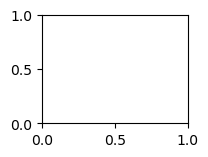

In [10]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

2023/12/14

https://github.com/keras-team/keras-io/tree/master/examples/vision
    mnist_convnet.py
    examples/vision/mnist_convnet.py

In [3]:
"""
Title: Simple MNIST convnet
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2015/06/19
Last modified: 2020/04/21
Description: A simple convnet that achieves ~99% test accuracy on MNIST.
Accelerator: GPU
"""

"""
## Setup
"""

import numpy as np
import keras
from keras import layers

In [4]:
"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
"""
## Build the model
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [6]:
"""
## Train the model
"""

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15


422/422 [==============================] - 10s 22ms/step - loss: 0.3604 - accuracy: 0.8911 - val_loss: 0.0805 - val_accuracy: 0.9788
Epoch 2/15
422/422 [==============================] - 10s 24ms/step - loss: 0.1106 - accuracy: 0.9660 - val_loss: 0.0558 - val_accuracy: 0.9847
Epoch 3/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0829 - accuracy: 0.9749 - val_loss: 0.0499 - val_accuracy: 0.9868
Epoch 4/15
422/422 [==============================] - 9s 21ms/step - loss: 0.0699 - accuracy: 0.9773 - val_loss: 0.0420 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0607 - accuracy: 0.9807 - val_loss: 0.0401 - val_accuracy: 0.9885
Epoch 6/15
422/422 [==============================] - 9s 21ms/step - loss: 0.0543 - accuracy: 0.9833 - val_loss: 0.0354 - val_accuracy: 0.9917
Epoch 7/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.0368 - val_accuracy: 0

In [7]:
"""
## Evaluate the trained model
"""

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0234499704092741
Test accuracy: 0.9925000071525574


https://www.jianshu.com/p/5c61bc43510e

In [12]:
import numpy as np
import pandas as pd
#from keras.utils import np_utils
from keras.utils import to_categorical
np.random.seed(10)

In [13]:
from keras.datasets import mnist

#下载及读取mnist

(X_train_image,y_train_label), \
(X_test_image,y_test_label)=mnist.load_data()

#查看mnist

print('train data', len(X_train_image))
print('test data',len(X_test_image))

# 查看训练数据

print('X_train_image:',X_train_image.shape)
print('y_train_label:',y_train_label.shape)

train data 60000
test data 10000
X_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [14]:
import matplotlib.pyplot as plt          #导入matplotlib.pyplot模块
def plot_image(image):                   #定义plot_image函数，传入image作为参数    
    fig=plt.gcf()                        #设置显示图形的大小
    fig.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')      #使用plt.show显示图形，传入参数image是28x28的图形，cmap参数设置为binary，以黑白灰度显示
    plt.show()                           #开始绘图

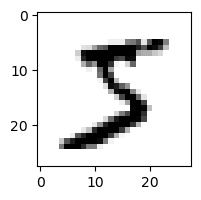

In [15]:
plot_image(X_train_image[0])